# **Import**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.metrics import geometric_mean_score
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

%matplotlib inline

Mounted at /content/drive


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize']=(12,8)

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Assignmnt Machine Learning[major]/oil_spill.csv')
data

,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,...,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,target
0,1,2558,1506.09,456.63,90,6395000,40.88,7.89,29780.0,0.19,...,2850.00,1000.00,763.16,135.46,3.73,0,33243.19,65.74,7.95,1
1,2,22325,79.11,841.03,180,55812500,51.11,1.21,61900.0,0.02,...,5750.00,11500.00,9593.48,1648.80,0.60,0,51572.04,65.73,6.26,0
2,3,115,1449.85,608.43,88,287500,40.42,7.34,3340.0,0.18,...,1400.00,250.00,150.00,45.13,9.33,1,31692.84,65.81,7.84,1
3,4,1201,1562.53,295.65,66,3002500,42.40,7.97,18030.0,0.19,...,6041.52,761.58,453.21,144.97,13.33,1,37696.21,65.67,8.07,1
4,5,312,950.27,440.86,37,780000,41.43,7.03,3350.0,0.17,...,1320.04,710.63,512.54,109.16,2.58,0,29038.17,65.66,7.35,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932,200,12,92.42,364.42,135,97200,59.42,10.34,884.0,0.17,...,381.84,254.56,84.85,146.97,4.50,0,2593.50,65.85,6.39,0
933,201,11,98.82,248.64,159,89100,59.64,10.18,831.0,0.17,...,284.60,180.00,150.00,51.96,1.90,0,4361.25,65.70,6.53,0
934,202,14,25.14,428.86,24,113400,60.14,17.94,847.0,0.30,...,402.49,180.00,180.00,0.00,2.24,0,2153.05,65.91,6.12,0
935,203,10,96.00,451.30,68,81000,59.90,15.01,831.0,0.25,...,402.49,180.00,90.00,73.48,4.47,0,2421.43,65.97,6.32,0


In [ ]:
data.head()

,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,...,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,target
0,1,2558,1506.09,456.63,90,6395000,40.88,7.89,29780.0,0.19,...,2850.00,1000.00,763.16,135.46,3.73,0,33243.19,65.74,7.95,1
1,2,22325,79.11,841.03,180,55812500,51.11,1.21,61900.0,0.02,...,5750.00,11500.00,9593.48,1648.80,0.60,0,51572.04,65.73,6.26,0
2,3,115,1449.85,608.43,88,287500,40.42,7.34,3340.0,0.18,...,1400.00,250.00,150.00,45.13,9.33,1,31692.84,65.81,7.84,1
3,4,1201,1562.53,295.65,66,3002500,42.40,7.97,18030.0,0.19,...,6041.52,761.58,453.21,144.97,13.33,1,37696.21,65.67,8.07,1
4,5,312,950.27,440.86,37,780000,41.43,7.03,3350.0,0.17,...,1320.04,710.63,512.54,109.16,2.58,0,29038.17,65.66,7.35,0


# **Data Cleaning**

In [ ]:
data.duplicated().any()

False

In [ ]:
data.isnull().sum().any()

False

# **Data Preprocessing**

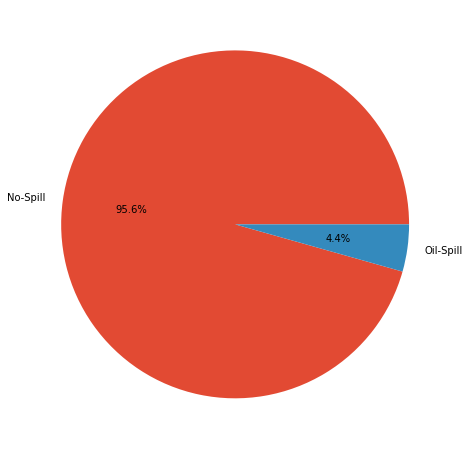

In [ ]:
inter=data['target'].value_counts()
plt.pie(inter,labels=['No-Spill','Oil-Spill'],autopct='%0.1f%%',radius=1);

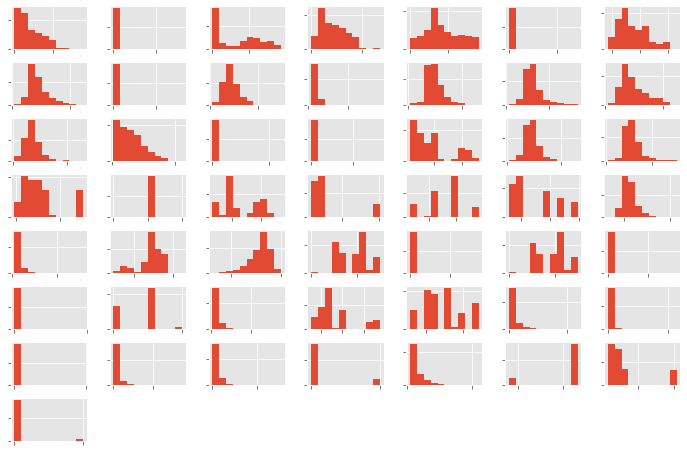

In [ ]:
ax = data.hist()

for axis in ax.flatten():
    axis.set_title('')
    axis.set_xticklabels([])
    axis.set_yticklabels([])

In [ ]:
data.drop(['f_1','f_23'], axis=1, inplace=True)

X=data.drop('target', axis=1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# **Dummy Classifier**

In [ ]:
def evaluate_model(X, y, model):
    
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    metric = make_scorer(geometric_mean_score)
    scores = cross_val_score(model, X, y, scoring=metric, cv=cv, n_jobs=-1)
    return scores

In [ ]:
model = DummyClassifier(strategy='uniform')
scores = evaluate_model(X_train, y_train, model)

print('Mean G-Mean: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Mean G-Mean: 0.438 (0.170)


# **Algorithm Spot Checking**

In [ ]:
def get_models():
    
    models, names = list(), list()

    steps = [('t',StandardScaler()),('m',LogisticRegression(solver='liblinear'))]
    models.append(Pipeline(steps=steps))
    names.append('LR')
    
    steps = [('t', StandardScaler()),('m',LinearDiscriminantAnalysis())]
    models.append(Pipeline(steps=steps))
    names.append('LDA')
    
    models.append(GaussianNB())
    names.append('NB')
    
    models.append(RandomForestClassifier())
    names.append('RFC')
    
    models.append(XGBClassifier())
    names.append('XGB')
    
    models.append(LGBMClassifier())
    names.append('lGB')
    
    return models, names

In [ ]:
models, names = get_models()
results = list()

for i in range(len(models)):
    scores = evaluate_model(X_train, y_train, models[i])
    results.append(scores)
    print('>%s %.3f (%.3f)' % (names[i], np.mean(scores), np.std(scores)))

>LR 0.667 (0.257)
>LDA 0.761 (0.194)
>NB 0.779 (0.131)
>RFC 0.429 (0.291)
>XGB 0.577 (0.294)
>lGB 0.539 (0.262)


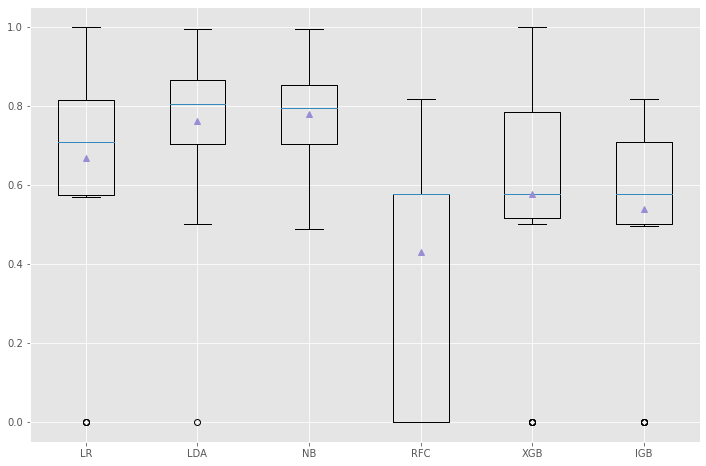

In [ ]:
plt.boxplot(results, labels=names, showmeans=True);

# **Balanced Logistic Regression with differnet standardizing techniques**

In [ ]:
def get_models():
    
    models, names = list(), list()
    
    # LR Balanced
    models.append(LogisticRegression(solver='liblinear', class_weight='balanced'))
    names.append('Balanced')
    
    # LR Balanced + Normalization
    steps = [('t',MinMaxScaler()), ('m', LogisticRegression(solver='liblinear',
                                                            class_weight='balanced'))]
    models.append(Pipeline(steps=steps))
    names.append('Balanced-Norm')

    # LR Balanced + Standardization
    steps = [('t',StandardScaler()), ('m', LogisticRegression(solver='liblinear',
                                                              class_weight='balanced'))]
    models.append(Pipeline(steps=steps))
    names.append('Balanced-Std')
    
    # LR Balanced + Power
    steps = [('t1',MinMaxScaler()), ('t2',PowerTransformer()), ('m',
                                                                LogisticRegression(solver='liblinear', class_weight='balanced'))]
    models.append(Pipeline(steps=steps))
    names.append('Balanced-Power')
    
    return models, names

In [ ]:
models, names = get_models()
results = list()

for i in range(len(models)):
    scores = evaluate_model(X_train, y_train, models[i])
    results.append(scores)
    
    print('>%s %.3f (%.3f)' % (names[i], np.mean(scores), np.std(scores)))

>Balanced 0.863 (0.093)
>Balanced-Norm 0.833 (0.123)
>Balanced-Std 0.829 (0.132)
>Balanced-Power 0.831 (0.121)


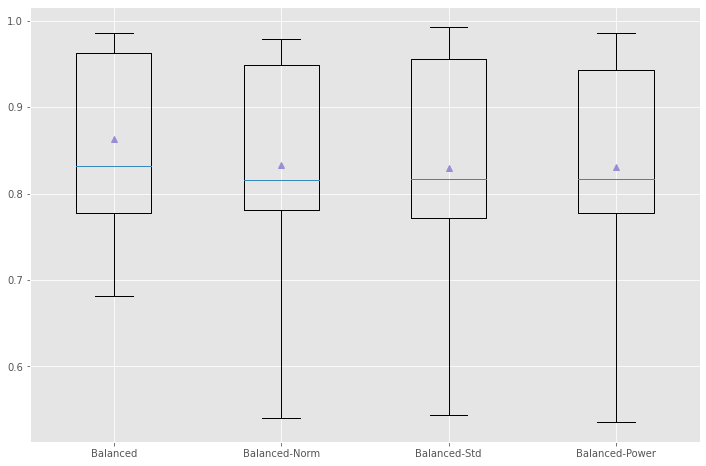

In [ ]:
plt.boxplot(results, labels=names, showmeans=True);

# **Evaluate Data Sampling With Probabilistic Models**

In [ ]:
def get_models():
    
    models, names = list(), list()

    # SMOTEENN
    sampling = SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='majority'))
    model = LogisticRegression(solver='liblinear')
    steps = [('e', sampling), ('m', model)]
    models.append(Pipeline(steps=steps))
    names.append('LR')

    # SMOTEENN + Norm
    sampling = SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='majority'))
    model = LogisticRegression(solver='liblinear')
    steps = [('t', MinMaxScaler()), ('e', sampling), ('m', model)]
    models.append(Pipeline(steps=steps))
    names.append('Norm')
    
    # SMOTEENN + Std
    sampling = SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='majority'))
    model = LogisticRegression(solver='liblinear')
    steps = [('t', StandardScaler()), ('e', sampling), ('m', model)]
    models.append(Pipeline(steps=steps))
    names.append('Std')

    # SMOTEENN + Power
    sampling = SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='majority'))
    model = LogisticRegression(solver='liblinear')
    steps = [('t1', MinMaxScaler()), ('t2', PowerTransformer()), ('e', sampling), ('m',
                                                                                   model)]
    models.append(Pipeline(steps=steps))
    names.append('Power')
    
    return models, names

In [ ]:
models, names = get_models()
results = list()

for i in range(len(models)):
    scores = evaluate_model(X_train, y_train, models[i])
    results.append(scores)
    
    print('>%s %.3f (%.3f)' % (names[i], np.mean(scores), np.std(scores)))

>LR 0.821 (0.081)
>Norm 0.837 (0.117)
>Std 0.820 (0.129)
>Power 0.874 (0.102)


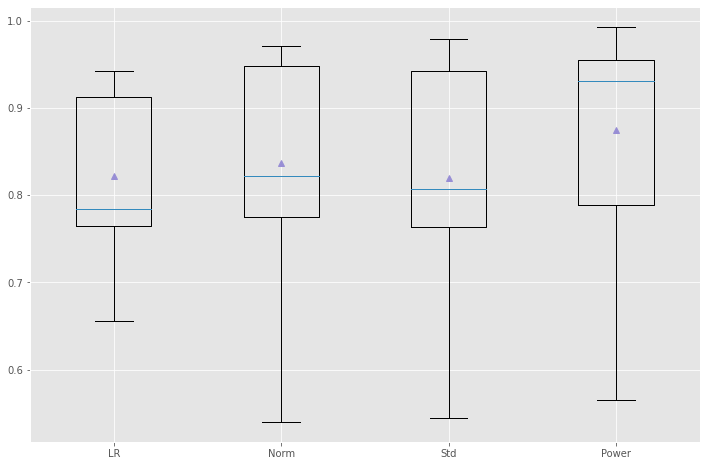

In [ ]:
plt.boxplot(results, labels=names, showmeans=True);

# **Final Model**

In [ ]:
smoteenn = SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='majority'))
model = LogisticRegression(solver='liblinear')
pipeline = Pipeline(steps=[('e', smoteenn), ('m', model)])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('e',
                 SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='majority'))),
                ('m', LogisticRegression(solver='liblinear'))])

In [ ]:
Pipeline(steps=[('e',
                 SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='majority'))),
                ('m', LogisticRegression(solver='liblinear'))])

Pipeline(steps=[('e',
                 SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='majority'))),
                ('m', LogisticRegression(solver='liblinear'))])

In [ ]:
y_pred=pipeline .predict(X_test)

In [ ]:
print(f'Classification_report: \n\n {classification_report(y_test,y_pred)}')

Classification_report: 

               precision    recall  f1-score   support

           0       0.99      0.86      0.92       180
           1       0.21      0.88      0.34         8

    accuracy                           0.86       188
   macro avg       0.60      0.87      0.63       188
weighted avg       0.96      0.86      0.89       188



In [ ]:
val=['No-Spill','Oil Spill']
data=pd.DataFrame(confusion_matrix(y_test,y_pred),columns=val,index=val)

Text(51.0, 0.5, 'True Label')

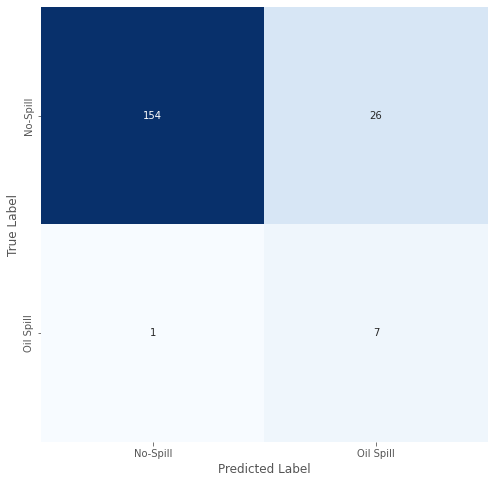

In [ ]:
plt.figure(figsize=(8,8))

sns.heatmap(data,annot=True,cbar=False,cmap='Blues',fmt='g');
plt.xlabel('Predicted Label')
plt.ylabel('True Label')